In [1]:
#Leer txt y guardarlo en un datoframe pandas
import pandas as pd

# Leer el archivo de texto
df = pd.read_csv('./Data/data.txt', sep=' ', header=None)
df.columns = ['ID', 'Background_tissue', 'Class', 'Severity', 'Abnormality_X', 'Abnormality_Y', 'Radius']


df.head()

,ID,Background_tissue,Class,Severity,Abnormality_X,Abnormality_Y,Radius
0,mdb001,G,CIRC,B,535,425,197.0
1,mdb002,G,CIRC,B,522,280,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477,133,30.0


### A. Distribución de clases.
I. ¿Cuántas imágenes son normales y anormales?

Hay 207 imágenes normales y 123 anormales

In [13]:
#Contar cuantas veces el valor es igual a NORM en la columna class
norm_count = df[df['Class'] == 'NORM'].shape[0]
print(norm_count)


207


In [17]:
#Revisar si hay valores vacíos en la columna
empty_in_column = df['Class'].isnull().any()
print(empty_in_column)

#Ya que se sabe que no hay vacios se puede obtener de la siguiente manera
anorm_count = df[df['Class'] != 'NORM'].shape[0]
print(anorm_count)

False
123


II. ¿Qué porcentaje corresponde a cada tipo de anormalidad (masa, calcificación, distorción arquitectónica, entre otros)?

CALC = 9.09%

CIRC = 7.58%

SPIC = 5.76%

MISC = 4.54%

ARCH = 5.76%

ASYM = 4.54%

In [31]:
rows = df.shape[0]
CALC_count = df[df['Class'] == 'CALC'].shape[0]
calc_percentage = (CALC_count / rows) * 100
print(calc_percentage)

9.090909090909092


In [26]:
CIRC_count = df[df['Class'] == 'CIRC'].shape[0]
circ_percentage = (CIRC_count / rows) * 100
print(circ_percentage)

7.575757575757576


In [28]:
SPIC_count = df[df['Class'] == 'SPIC'].shape[0]
spic_percentage = (SPIC_count / rows) * 100
print(spic_percentage)

5.757575757575758


In [32]:
MISC_count = df[df['Class'] == 'MISC'].shape[0]
misc_percentage = (MISC_count / rows) * 100
print(misc_percentage)

4.545454545454546


In [33]:
ARCH_count = df[df['Class'] == 'ARCH'].shape[0]
arch_percentage = (ARCH_count / rows) * 100
print(arch_percentage)

5.757575757575758


In [34]:
ASYM_count = df[df['Class'] == 'ASYM'].shape[0]
asym_percentage = (ASYM_count / rows) * 100
print(asym_percentage)


4.545454545454546


### D. Tamaño de las lesiones.
I. ¿Qué tan grandes son las lesiones? Por ejemplo, mini-MIAS da un radio aproximada de cada lesión en píxeles.

El promedio del tamaño de las lesiones es de 48.85 pixeles con una desviación estandar de 33.56. Debido a que las imágenes cuentan con un tamaño de 1024 pixeles x 1024 pixeles se puede decir que el tamaño de las lesiones es pequeño. Tomando en cuenta que un radio de 48.85 ocupa un área de 7495 pixeles de los 1,048,576 pixeles que existen en cada imagen.

In [47]:
#Ya que no todas las imágenes presentn lesiones, se pueden eliminar los valores nulos
Radius = df.dropna(subset=['Radius'])
Radius = Radius['Radius']

print(f"Promedio del radio de las anomalias: {Radius.mean()} +- {Radius.std()}")


Promedio del radio de las anomalias: 48.84873949579832 +- 33.558862694477845


<Axes: >

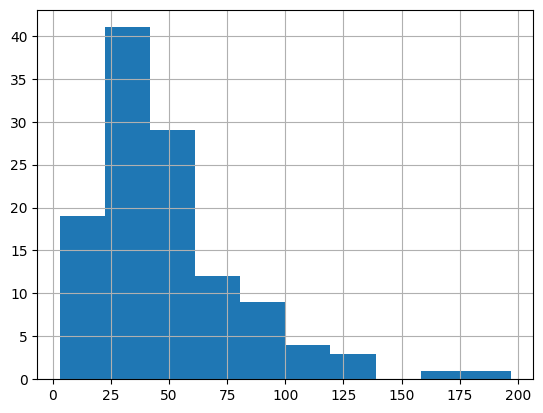

In [45]:
Radius.hist()